In [1]:
import pickle
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from periodictable import elements

In [2]:
import exfor_tools

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [3]:
from query_elastic import print_failed_parses, query_elastic_data, reattempt_parse, output_dir

In [4]:
import jitr

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target = (144, 62)

In [7]:
(
    (entries_pp, failed_parses_pp),
    (entries_ppr, failed_parses_ppr),
    (entries_nn, failed_parses_nn),
) = query_elastic_data(target)


Parsing (p,p) ...
Found subentry C3000002 with the following columns:
['EN', 'E-RSL-FW', 'ANG-CM', 'DATA-CM']
Found subentry E0773006 with the following columns:
['EN', 'POL-BM-MIN', 'POL-BM-MAX', 'ANG-CM', 'DATA-CM', 'DATA-CM']
Failed to parse subentry E0773006:
	Error while parsing E0773006: Expected only one DATA column, found 2
Found subentry E0904044 with the following columns:
['EN', 'POL-BM-MIN', 'POL-BM-MAX', 'ANG-CM', 'DATA-CM']
Found subentry O0032069 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']

Succesfully parsed 3 entries for (p,p)
Failed to parse 1 entries



Parsing (p,p) ratio ...

Succesfully parsed 0 entries for (p,p) ratio
Failed to parse 0 entries



Parsing (n,n)...

Succesfully parsed 0 entries for (n,n)
Failed to parse 0 entries




# $(p,p)$

## Handle failed parses for $(p,p)$
- E0773006 is a polarized measurement, not relevant here. I believe the reaction quantity is mislabeled.

In [8]:
print_failed_parses(failed_parses=failed_parses_pp)

Entry: E0773
Error while parsing E0773006: Expected only one DATA column, found 2


## Reject none-useful, discrepant our outlying experiments

# $(p,p)$ ratio

## handle failed parses for $(p,p)$ ratio

In [9]:
print_failed_parses(failed_parses=failed_parses_ppr)

## Reject non-useful, discrepant our outlying experiments

## handle failed parses for $(n,n)$ ratio

In [10]:
print_failed_parses(failed_parses=failed_parses_nn)

# Plotting

## Plot $(p,p)$

In [22]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_pp, min_num_pts=4
)

In [23]:
[[(m.subentry, m.Einc) for m in l] for l in measurements_categorized]

[[('C3000002', 29.3)], [('E0904044', 65.0)]]

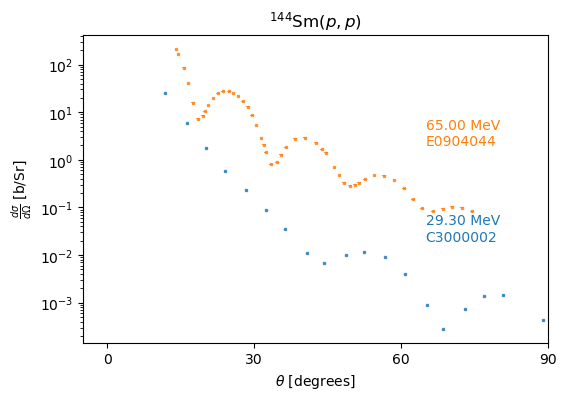

In [24]:
n_per_plot = 10
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 4))
if not isinstance(axes, np.ndarray):
    axes = [axes]
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_pp.values())[0].data_symbol,
        rxn_label=list(entries_pp.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": 65,
            "label_offset_factor": 0.02,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
    axes[i].set_xlim([-5, 90])

In [14]:
entries_pp

{'C3000': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7c2a5368a190>,
 'E0904': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7c2a537e6c10>,
 'O0032': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7c2a5345fb10>}

In [15]:
entries_pp["O0032"].meta

{'author': ['H.Sakaguchi'],
 'title': 'Systematic Study On The Elastic Scattering Of 65 Mev Polarized Protons.',
 'year': '1983',
 'institute': INSTITUTE  (2JPNKTO)}

In [16]:
entries_pp["E0904"].meta

{'author': ['F.Ohtani',
  'H.Sakaguchi',
  'M.Nakamura',
  'T.Noro',
  'H.Sakamoto',
  'H.Ogawa',
  'T.Ichihara',
  'M.Yosoi',
  'S.Kobayashi'],
 'title': 'Anomaly In The Optical Potential For Deformed Nuclei',
 'year': '1983',
 'institute': INSTITUTE  (2JPNKTO) Department of Physics}

In [17]:
entries_pp["E0904"].measurements[0].y_err

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
entries_pp["O0032"].measurements[0].y_err

array([1.85e-02, 1.63e-02, 1.18e-02, 5.70e-03, 2.50e-03, 1.30e-03,
       1.50e-03, 2.40e-03, 2.40e-03, 3.30e-03, 3.20e-03, 4.80e-03,
       4.70e-03, 4.60e-03, 3.50e-03, 3.80e-03, 1.90e-03, 1.50e-03,
       8.20e-04, 5.00e-04, 3.80e-04, 3.60e-04, 1.90e-04, 2.50e-04,
       2.30e-04, 4.50e-04, 5.50e-04, 3.10e-04, 2.80e-04, 2.40e-04,
       1.80e-04, 1.30e-04, 9.10e-05, 8.70e-05, 8.10e-05, 7.10e-05,
       7.50e-05, 8.20e-05, 9.00e-05, 8.00e-05, 7.10e-05, 5.90e-05,
       3.60e-05, 3.30e-05, 2.70e-05, 2.30e-05, 2.40e-05, 2.40e-05,
       2.20e-05])

In [19]:
entries_pp["E0904"].measurements[0].y_err = entries_pp["O0032"].measurements[0].y_err
entries_pp["E0904"].measurements[0].statistical_err = (
    entries_pp["O0032"].measurements[0].statistical_err
)
del entries_pp["O0032"]

## plot $(p,p)$ ratio

In [20]:
entries_pp["E0904"].measurements[0].notes = [
    "clearly the two 65 MeV data sets (published in PRC same author in ssubsequent years) is exactly the same with different normalizations. "
    "We will take the normalization from the later one, E0904. However, E0904 does not have errors, so we will take those from O0032."
]

## Plot $(n,n)$

# Write data to disk

In [21]:
A, Z = target
with open(output_dir / f"{elements[Z]}{A}_diff_xs.pkl", "wb") as f:
    pickle.dump(
        {"n,n": entries_nn, "p,p": {"absolute": entries_pp, "ratio": entries_ppr}}, f
    )